In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# Checking the data types of the columns of the dataset:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# Counting null values:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
# Drop duplicates and print the shape of the dataset
df.drop_duplicates(inplace=True)
df.shape

(147, 5)

In [18]:
# Counting the number of the species in the dataset
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [20]:
# Counting the precentage of each one of the species in the dataset
df.Species.value_counts(normalize=True)

Iris-versicolor    0.340136
Iris-virginica     0.333333
Iris-setosa        0.326531
Name: Species, dtype: float64

In [21]:
# Printing the summary statistics of the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


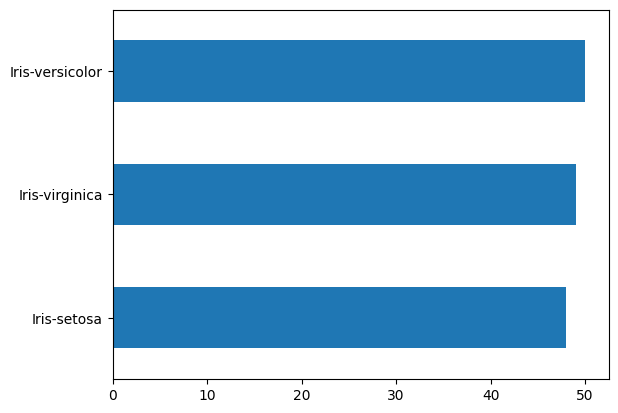

In [22]:
# ploting the species inour dataset:
ax = df.Species.value_counts().plot(kind='barh')
ax.invert_yaxis()

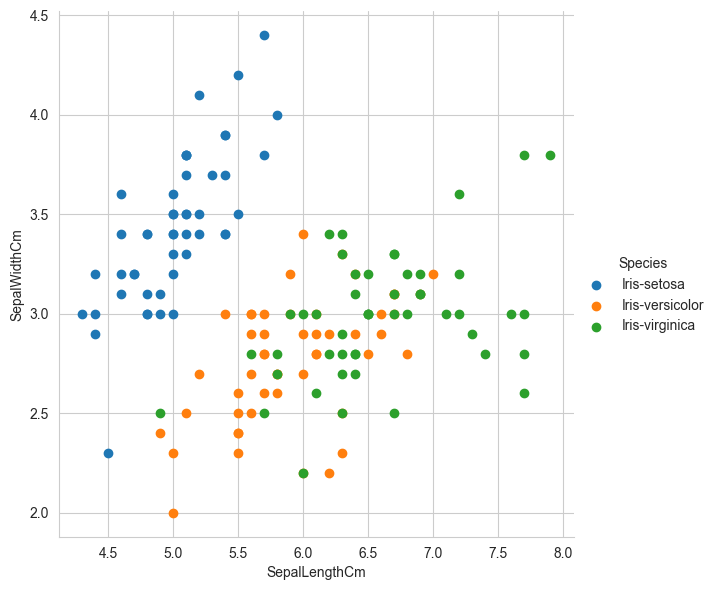

In [24]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

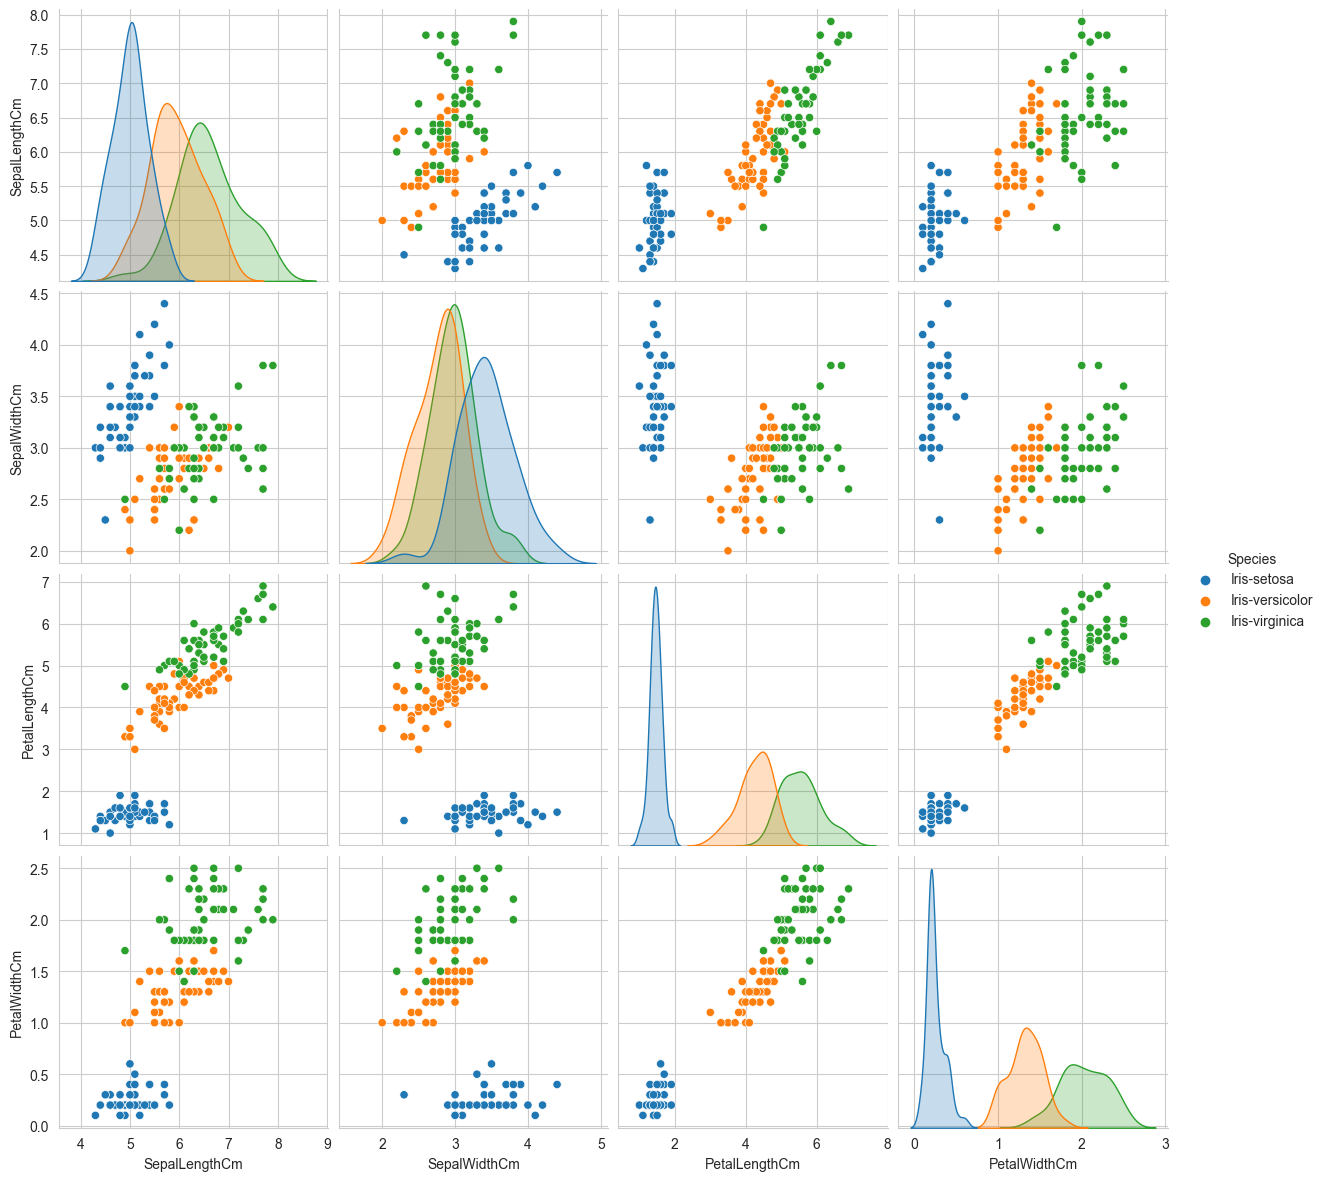

In [25]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Species", size=3);
plt.show()

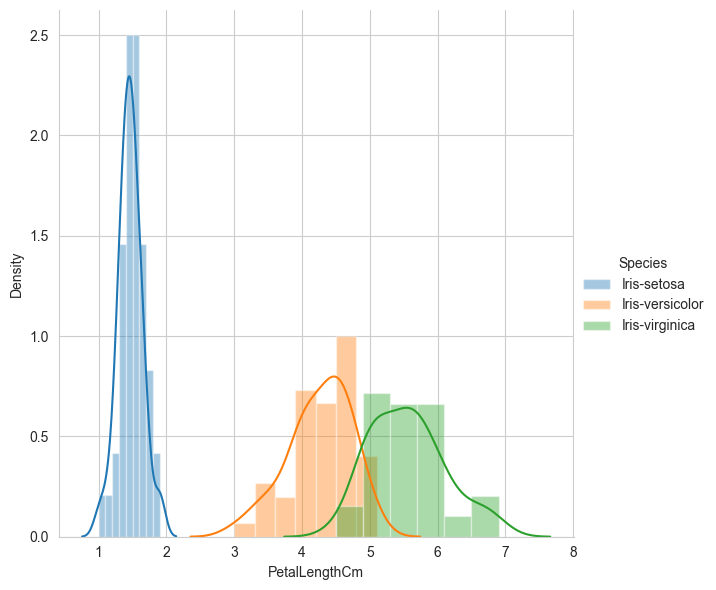

In [26]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend()
plt.show()

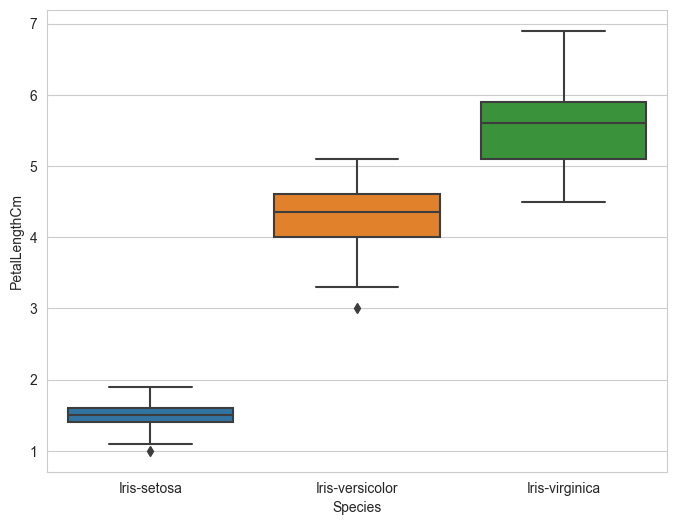

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Species',y='PetalLengthCm', data=df)
plt.show()

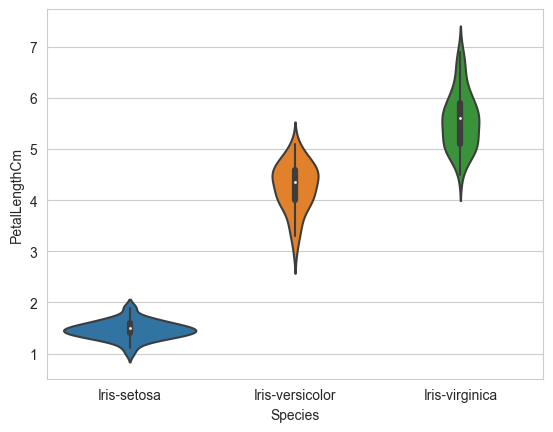

In [28]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=8)
plt.show()

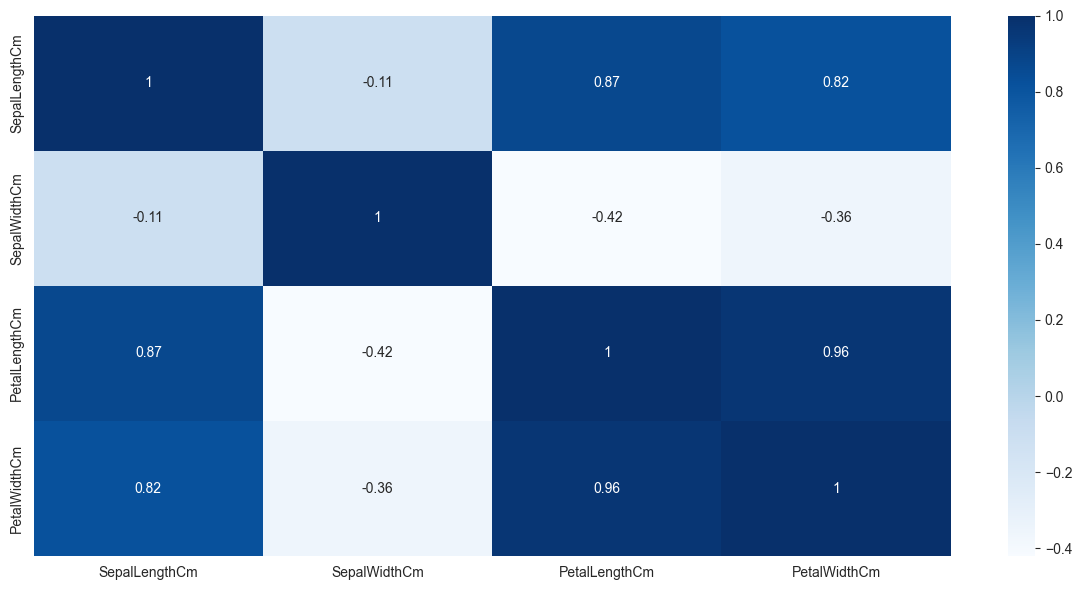

In [29]:
# Creating heat map to observe the corelation between variables inout dataset
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.tight_layout()

In [30]:
x= df.drop('Species',axis=1)
y= df['Species']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)

In [33]:
# features for plotting the decision tree graphs
features = x.columns.tolist()
target = y.value_counts().index

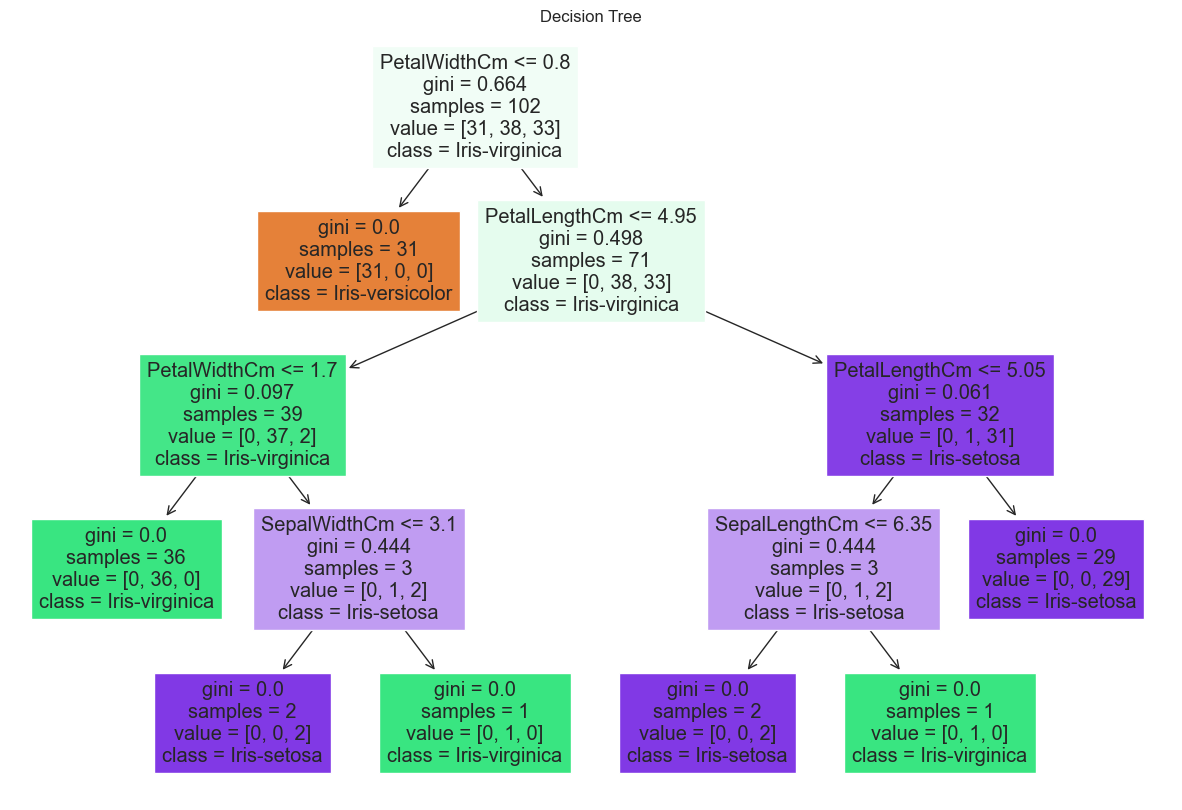

In [34]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,feature_names=features,  
                   class_names=target,
                   filled=True)
plt.title("Decision Tree")
plt.show()